In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#When Updating Start Here 
MouseWeights = pd.read_excel("RawWeights2.xlsx",header=0)
#print(MouseWeights.shape)
#MouseWeights.head()
MouseWeights


,Cage,mouse,date,Hard vs Easy,weight
0,1,1,2025-09-08,Hard w HFD,24.50
1,1,2,2025-09-08,Hard w HFD,26.17
2,2,1,2025-09-08,Easy w HFD,27.01
3,2,2,2025-09-08,Easy w HFD,26.66
4,3,1,2025-09-08,Hard w HFD,25.75
...,...,...,...,...,...
401,6,1,2025-10-29,Easy w Chow,28.77
402,6,2,2025-10-29,Easy w Chow,27.89
403,7,1,2025-10-29,Hard w Chow,30.02
404,7,2,2025-10-29,Hard w Chow,29.03


In [18]:

# Clean up column names
MouseWeights.columns = ["Cage", "Mouse", "Date", "Group_Feeder", "Weight"]

# Ensure Date column is datetime
MouseWeights["Date"] = pd.to_datetime(MouseWeights["Date"])



MouseWeights


,Cage,Mouse,Date,Group_Feeder,Weight
0,1,1,2025-09-08,Hard w HFD,24.50
1,1,2,2025-09-08,Hard w HFD,26.17
2,2,1,2025-09-08,Easy w HFD,27.01
3,2,2,2025-09-08,Easy w HFD,26.66
4,3,1,2025-09-08,Hard w HFD,25.75
...,...,...,...,...,...
401,6,1,2025-10-29,Easy w Chow,28.77
402,6,2,2025-10-29,Easy w Chow,27.89
403,7,1,2025-10-29,Hard w Chow,30.02
404,7,2,2025-10-29,Hard w Chow,29.03


In [19]:
# Group by Date and Group_Feeder, then calculate mean and standard error

summary = MouseWeights.groupby(["Date", "Group_Feeder"])["Weight"].agg(
    mean="mean",
    se=lambda x: x.std(ddof=1) / np.sqrt(len(x))   # standard error formula
).reset_index()

summary.tail(20)
#weights



,Date,Group_Feeder,mean,se
90,2025-10-20,Easy w Chow,27.603333,0.239606
91,2025-10-20,Easy w HFD,39.092500,1.359641
92,2025-10-20,Hard w Chow,28.302500,0.499956
93,2025-10-20,Hard w HFD,37.482500,1.670436
94,2025-10-22,Easy w Chow,28.076667,0.151033
95,2025-10-22,Easy w HFD,39.572500,1.542759
96,2025-10-22,Hard w Chow,28.530000,0.579252
97,2025-10-22,Hard w HFD,37.922500,1.744708
98,2025-10-24,Easy w Chow,27.646667,0.342069
99,2025-10-24,Easy w HFD,40.420000,1.623294


In [20]:
# Optional: rename columns for clarity
summary.rename(columns={
    "date": "Date",
    "Hard vs Easy + Food": "Group_Feeder",
    "mean": "Mean_Weight",
    "se": "SE"
}, inplace=True)

#remove invisible spaces 
summary["Group_Feeder"] = summary["Group_Feeder"].str.strip()
summary

#use this to find invisible spaces 
summary["Group_Feeder"].value_counts()
summary["Group_Feeder"].unique()


#easy_hfd = summary[summary["Group_Feeder"] == "Easy w HFD "]
#easy_hfd

array(['Easy w Chow', 'Easy w HFD', 'Hard w Chow', 'Hard w HFD'],
      dtype=object)

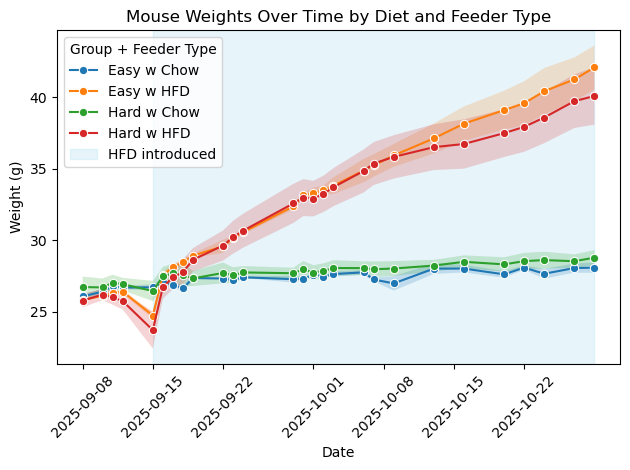

In [21]:
sns.lineplot( data = summary, x = "Date", y = "Mean_Weight", hue = "Group_Feeder", marker = "o", errorbar = "se")



start_hfd = pd.to_datetime("2025-09-15")   # adjust year if needed
plt.axvspan(
    start_hfd, 
    summary['Date'].max(),      # shade until the last date in your data
    color='skyblue', 
    alpha=0.2,                  # transparency
    label='HFD introduced'
)
for group, data in summary.groupby("Group_Feeder"):
# Add shaded SE region
    plt.fill_between(
        data["Date"],
        data["Mean_Weight"] - data["SE"],
        data["Mean_Weight"] + data["SE"],
        alpha=0.2
    )


# Labels and formatting
plt.title("Mouse Weights Over Time by Diet and Feeder Type")
plt.ylabel("Weight (g)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title="Group + Feeder Type", loc='best')
plt.tight_layout()
plt.show()


In [16]:

HardHFD = MouseWeights.query('Group_Feeder == "Hard w HFD"')
HardHFD.tail
#means for each group for most recent weighing day 
summary.tail(4)

,Date,Group_Feeder,Mean_Weight,SE
106,2025-10-29,Easy w Chow,28.0700,0.363501
107,2025-10-29,Easy w HFD,42.0775,1.538573
108,2025-10-29,Hard w Chow,28.7725,0.527437
109,2025-10-29,Hard w HFD,40.0825,2.004945


In [4]:
prox = pd.DataFrame()
prox = pd.read_excel("Prox.xlsx") 
#prox - check dataframe

In [1]:
#prox.sort_values("Prox")
#prox.sort_values("Food Type")


In [5]:
prox['Date'] = pd.to_datetime(prox['Date'])
#print(prox['Prox'].dtype)
#print(prox['Food Type'].dtype)


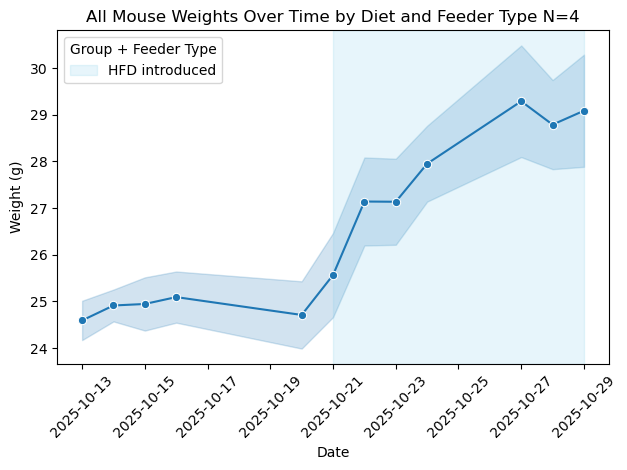

In [9]:
#plot all mice - not separated by prox time 
sns.lineplot(data= prox, x="Date", y="Weight", marker="o", errorbar = "se") #all mice

start_hfd = pd.to_datetime("2025-10-21")   # adjust year if needed
plt.axvspan(
    start_hfd, 
    prox['Date'].max(),      # shade until the last date in your data
    color='skyblue', 
    alpha=0.2,                  # transparency
    label='HFD introduced'
)



# Labels and formatting
plt.title("All Mouse Weights Over Time by Diet and Feeder Type N=4")
plt.ylabel("Weight (g)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title="Group + Feeder Type", loc='best')
plt.tight_layout()
plt.show()


In [ ]:
#plot for 2 mice that have good prox data --> 1 sec, 2 sec, 3 sec 
prox.query("Mouse == 1")

sns.lineplot(data= prox, x="Date", y="Weight", marker="o", errorbar = "se")


start_hfd = pd.to_datetime("2025-10-21")   # adjust year if needed
plt.axvspan(
    start_hfd, 
    prox['Date'].max(),      # shade until the last date in your data
    color='skyblue', 
    alpha=0.2,                  # transparency
    label='HFD introduced'
)



# Labels and formatting
plt.title("Mouse Weights Over Time by Diet and Feeder Type")
plt.ylabel("Weight (g)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title="Group + Feeder Type", loc='best')
plt.tight_layout()
plt.show()


In [7]:
Mouse1 = prox.query("Mouse == 1")
Mouse2 = prox.query("Mouse ==2")

#new pandas dataframe that combines the two mice that have good prox data 
combined = pd.concat([Mouse1, Mouse2])
combined



,Mouse,Date,Prox,Weight,Food Weight,Food Type
0,1,2025-10-13,0,23.97,350.53,chow
4,1,2025-10-14,0,24.23,345.76,chow
8,1,2025-10-15,0,24.19,341.38,chow
12,1,2025-10-16,0,24.48,337.73,chow
16,1,2025-10-20,0,23.61,321.70,HFD
20,1,2025-10-21,0,23.40,346.02,HFD
24,1,2025-10-22,0,24.85,342.29,HFD
28,1,2025-10-23,0,25.36,344.23,HFD
32,1,2025-10-24,0,26.30,341.19,HFD
36,1,2025-10-27,1,26.87,333.61,HFD


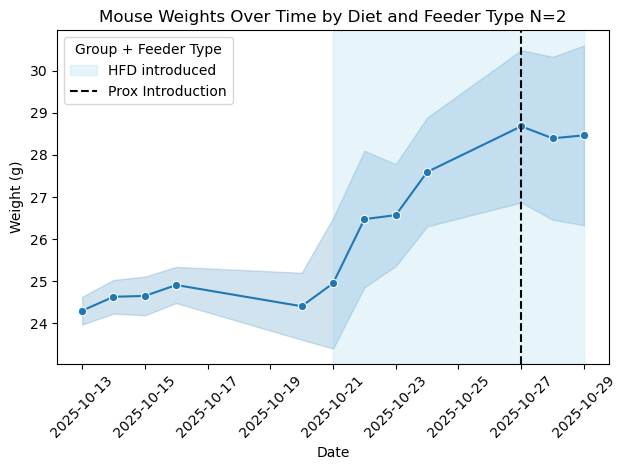

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=combined, x="Date", y="Weight", marker="o", errorbar="se")

# Shade HFD introduction
start_hfd = pd.to_datetime("2025-10-21")
plt.axvspan(
    start_hfd,
    prox['Date'].max(),
    color='skyblue',
    alpha=0.2,
    label='HFD introduced'
)

# Vertical lines for event days - for prox introduction
event_dates = ["2025-10-27"]

for date in event_dates:
    plt.axvline(
        pd.to_datetime(date),
        color='black',          # choose your color
        linestyle='--',       # dashed line
        linewidth=1.5,        # thickness
        label=f'Prox Introduction'  # label (optional)
    )

# Labels and formatting
plt.title("Mouse Weights Over Time by Diet and Feeder Type N=2")
plt.ylabel("Weight (g)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title="Group + Feeder Type", loc='best')
plt.tight_layout()
plt.show()

